# Tutorial 4: Visualisation

---

### Introduction

When dealing with classification data, visualisation is always useful because it can give us an idea of the distribution between the different classes. However, visualization is difficult if the data has many dimensions. To represent the data visually, it is necessary to reduce the dimensionality by identifying the most important features for characterizing the data--this is called _feature reduction_.  There are several methods for doing this. n this tutorial we will show how to use the following methods (for more information about each method, see links):
- [Principal component analysis (PCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html): this is the most widely used method for feature reduction.
- [T-distributed Stochastic Neighbor Embedding (tSNE)](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE)

Additional methods can be found [here](https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py)

---

First let's import some packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for plotting
import scipy.stats as st

Next let's recall the data. This tutorial will use the extracted features from the shallow autoencoder model (2nd notebook).

In [2]:
%store -r auto_df_train 
%store -r auto_df_test 
%store -r labels_train
%store -r labels_test
%store -r classes

In [3]:
print(auto_df_train.shape)

(8000, 128)


In the graphs, we will show two classes at a time to bring out the differences between classes. So we create a list of pairs of classes.

In [4]:
print(classes)

['smooth_round', 'smooth_cigar', 'edge_on_disk', 'unbarred_spiral']


In [5]:
from itertools import combinations
comb_class = list(combinations(classes, 2))
print(comb_class)

[('smooth_round', 'smooth_cigar'), ('smooth_round', 'edge_on_disk'), ('smooth_round', 'unbarred_spiral'), ('smooth_cigar', 'edge_on_disk'), ('smooth_cigar', 'unbarred_spiral'), ('edge_on_disk', 'unbarred_spiral')]


---

### Reduce dimensionality with PCA
PCA will take the original data with 64 features and identify two combined features which most effectively characterize the data variation. Each combined feature is a linear combination of the original 64 features (note that combined features may not have a direct practical interpretation--there only use is to characterize the data variation as much as possible).

Using `sklearn` it is easy to apply PCA to the dataset

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca_sample = PCA(n_components=2).fit_transform(np.array(auto_df_train))
print(pca_sample.shape)

(8000, 2)


The shape of the reduced PCA sample is now 8000 x 2 from 8000 x 64, so we can plot these samples in a 2D graph

We will represent the data using a scatterplot, and will superimpose confidence ellipses to bring out the general orientation and extent of the data. A confidence ellipse shows where the data is most heavily concentrated (i.e. where the probability density is highest). Confidence regions are used for predicting new observations with a certain degree of confidence, which depends on the confidence parameter (measured in standard deviations) used to generate the ellipse.

The function `draw_Confidence_ellipse` is in the file `ellipse.py` in the `source` subdirectory. The  syntax for the `draw_Confidence_ellipse` command is as follows:

 `draw_Confidence_ellipse (data1_x, data1_y, data2_x, data2_y, "y-axis label", "x-axis label", "title", x-scale, y-scale)"`


In [8]:
from source.ellipse import draw_confidence_ellipse


Now we're ready to create scatterplots for each pair of classes, using the combined features identified by PCA. It's better to plot only a subset of the data--otherwise the scatterplots are too crowded.  So we first define an index variable to select a sample.

In [9]:
np.random.seed(0)
idx = np.random.choice(1992, 1000)

Now for the plots!

In [ ]:
for cc in comb_class:
    class_i = (np.array(labels_train) == classes.index(cc[0]) ) # getting 1000 random samples from the 1st class
    class_j = (np.array(labels_train) == classes.index(cc[1]) ) # getting 1000 random samples from the 2nd class
    
    draw_confidence_ellipse (pca_sample[:, 0][class_i][idx], pca_sample[:, 1][class_i][idx], 
                             pca_sample[:, 0][class_j][idx], pca_sample[:, 1][class_j][idx], 
                             "comb1", "comb2", cc[0]+" vs. "+cc[1], (-10,30), (-7.5,7.5))


Any data samples that fall within both ellipses are likely to be confused between the two classes. Of the above graphs, smooth_round versus smooth_cigar shows the best separation, because many of smooth_cigar points are not in the smooth_round ellipse.

### Reduce dimensionality with TSNE
TSNE is an alternative dimension reduction method developed by Sam Roweis and Geoffrey Hinton. It is nonlinear, while PCA is linear.

In [11]:
from sklearn.manifold import TSNE

In [12]:
tsne_sample = TSNE(n_components=2, init='pca', perplexity=10, learning_rate = 10).fit_transform(np.array(auto_df_train)[idx])

/users/hussein/work/galaxy-cluster/v_gal/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


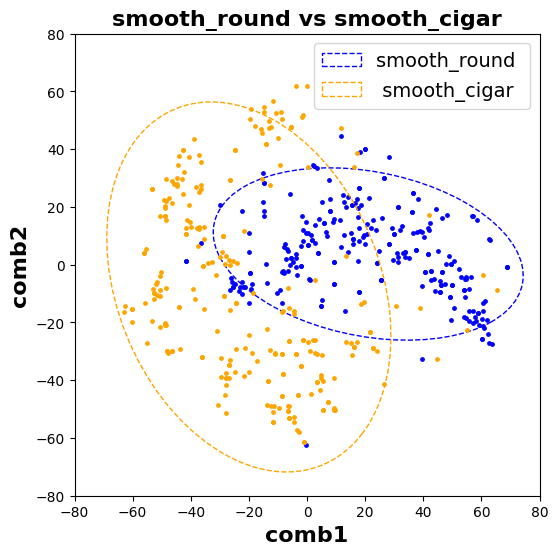

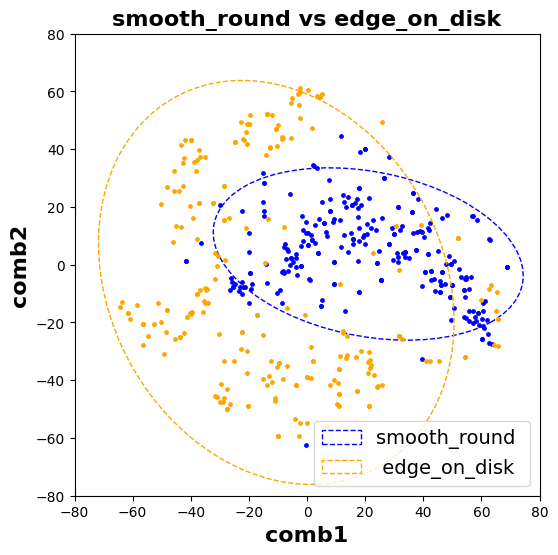

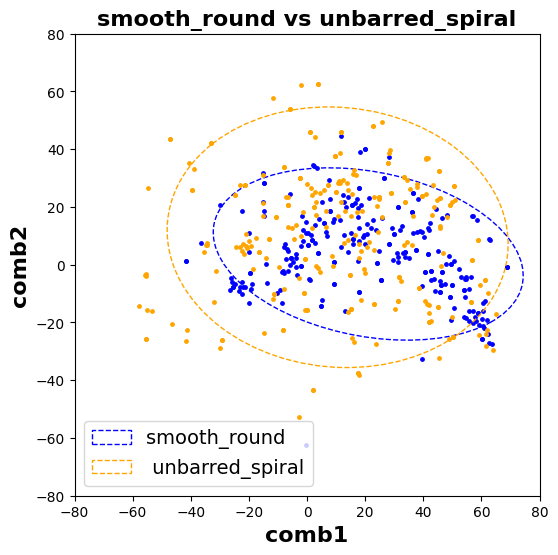

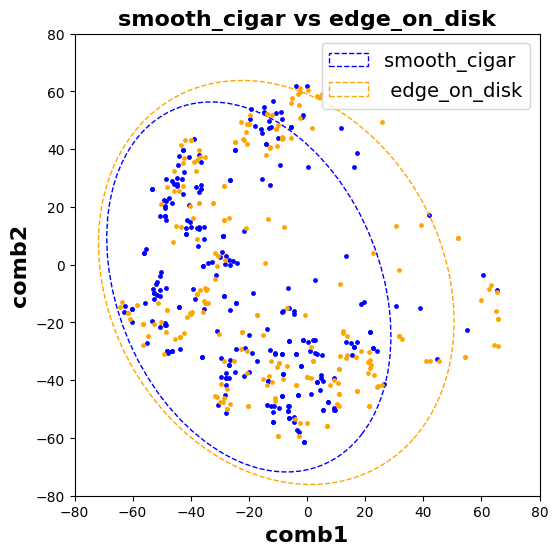

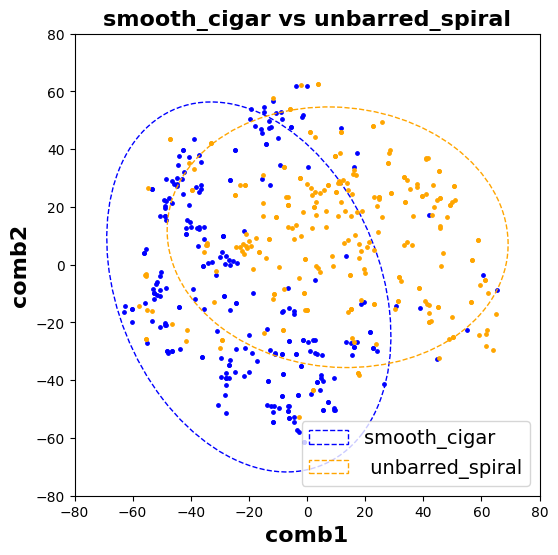

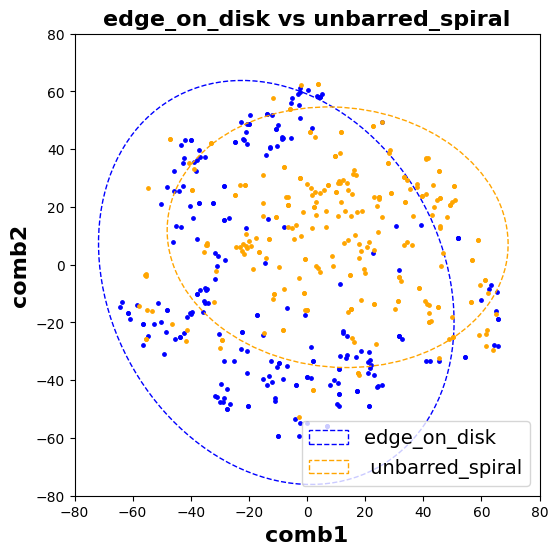

In [13]:
for cc in comb_class:
    class_i = (np.array(labels_train) == classes.index(cc[0]) )[idx] # we can restrict the number of samples from here
    class_j = (np.array(labels_train) == classes.index(cc[1]) )[idx]
    draw_confidence_ellipse (tsne_sample[:, 0][class_i], tsne_sample[:, 1][class_i], tsne_sample[:, 0][class_j], tsne_sample[:, 1][class_j], "comb1", "comb2", cc[0]+" vs "+cc[1], (-80,80), (-80,80))

The graph from both tools shows that it will be tough to distinguish between the `smooth round` and `unbarred_spiral`, because many of the points coincide. Also, the TSNE method does much better in determining the two classes than the PCA.

---

**Exercise :** from the List we showed [here](https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py)
choose another dimension reduction method and show the distibution between pairs of classes.

---

### Save the data

In [14]:
%store auto_df_train 
%store auto_df_test
%store pca_sample

Stored 'auto_df_train' (DataFrame)
Stored 'auto_df_test' (DataFrame)
Stored 'pca_sample' (ndarray)


---

Note, this tutorial is inspired by this work [here](https://spacetelescope.github.io/hellouniverse/notebooks/hello-universe/Classifying_PanSTARRS_sources_with_unsupervised_learning/Classifying_PanSTARRS_sources_with_unsupervised_learning.html)